# Проект по машинному обучению
# Волкова Полина группа 5030103/00301

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost

## Чтение и кодирование данных 

In [2]:
np.random.seed(320)

In [3]:
data = pd.read_json("data.json")
data

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


Были прочитаны данные, проверим наличие пропусков.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [5]:
data.isna().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

In [6]:
data.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

Пропусков нет, но данный вид данных не подходит для обучения модели, потому что мы не сможем последний столбец, в ячейках которого находится тип list(str), дать на вход какому-нибудь методу решения задачи машинного обучения.
\
Таким образом для начала нужно сделать вид данных пригодным для обучения.

Сделать это можно следующим способом, узнать все ингредиенты, которые есть в рецептах. После этого создать новый pd.DataFrame из нулей с количеством колонок равному длину этого списка и количеством строк как у исходного pd.DataFrame. После этого их можно объединить. Потом пройтись по каждой строке, во всех ячейках с названиями ингредиента в данной строке ставить 1 если ингредиент есть в списке и 0 в противном случае.

In [7]:
unique_ingredients = []
for i in range(len(data)):
    for j in data.loc[i, "ingredients"]:
        unique_ingredients.append(j)
unique_ingredients = list(set(unique_ingredients))
len(unique_ingredients)

6714

Всего уникальных ингредиентов 6714, размерность пространства для обучения будет $R^{39774 \times 6714}$

Создадим новый Dataframe

In [8]:
unique_ingredients = pd.DataFrame(data=0, index=np.arange(len(data)), columns=unique_ingredients)
unique_ingredients

,chicken wing drummettes,breakfast sausage links,dark soy sauce,orzo pasta,ramen noodles seasoning,tatsoi,Smart Balance Cooking Spray,honey mustard dressing,baby arugula,kefir,...,scallion greens,whole wheat couscous,petite peas,sour salt,daal,light beer,turkey mince,okra,crouton italian season,wakame
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Объединим с исходным

In [9]:
data = pd.concat([data, unique_ingredients], axis=1)

In [10]:
data

,id,cuisine,ingredients,chicken wing drummettes,breakfast sausage links,dark soy sauce,orzo pasta,ramen noodles seasoning,tatsoi,Smart Balance Cooking Spray,...,scallion greens,whole wheat couscous,petite peas,sour salt,daal,light beer,turkey mince,okra,crouton italian season,wakame
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
del unique_ingredients

Теперь нужно сделать One Hot Encoding.

In [12]:
for i in range(len(data)):
    for j in data.loc[i, "ingredients"]:
        data.loc[i, j] = 1
data        

,id,cuisine,ingredients,chicken wing drummettes,breakfast sausage links,dark soy sauce,orzo pasta,ramen noodles seasoning,tatsoi,Smart Balance Cooking Spray,...,scallion greens,whole wheat couscous,petite peas,sour salt,daal,light beer,turkey mince,okra,crouton italian season,wakame
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.loc[39773, "green chile"]

1

Совершили One Hot Encoding, можно избавится от колонки с id и ingredients, id не несёт смысла а ingredients уже декодировали.

In [14]:
data.drop(columns=["id", "ingredients"], inplace=True)

In [15]:
data

,cuisine,chicken wing drummettes,breakfast sausage links,dark soy sauce,orzo pasta,ramen noodles seasoning,tatsoi,Smart Balance Cooking Spray,honey mustard dressing,baby arugula,...,scallion greens,whole wheat couscous,petite peas,sour salt,daal,light beer,turkey mince,okra,crouton italian season,wakame
0,greek,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,irish,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,italian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,irish,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,chinese,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Теперь в исходной таблице остался только таргет (cuisine) и пространство фичей (матрица размером 39774 на 6714).

По таким данным уже можно обучать модель, но можно вытащить некоторую информацию из таблице.
\
Приступим ко второму пункту с анализом данных.

## Анализ

Найдем количество классов.

In [16]:
data["cuisine"].nunique()

20

Всего 20 классов. Данная задача - задача мультиклассификации на 20 классов.

In [17]:
cuisine = (data["cuisine"].value_counts() / data["cuisine"].value_counts().sum() * 100).reset_index()
cuisine

,cuisine,count
0,italian,19.706341
1,mexican,16.186453
2,southern_us,10.861367
3,indian,7.550158
4,chinese,6.720471
5,french,6.652587
6,cajun_creole,3.886961
7,thai,3.869362
8,japanese,3.577714
9,greek,2.954191


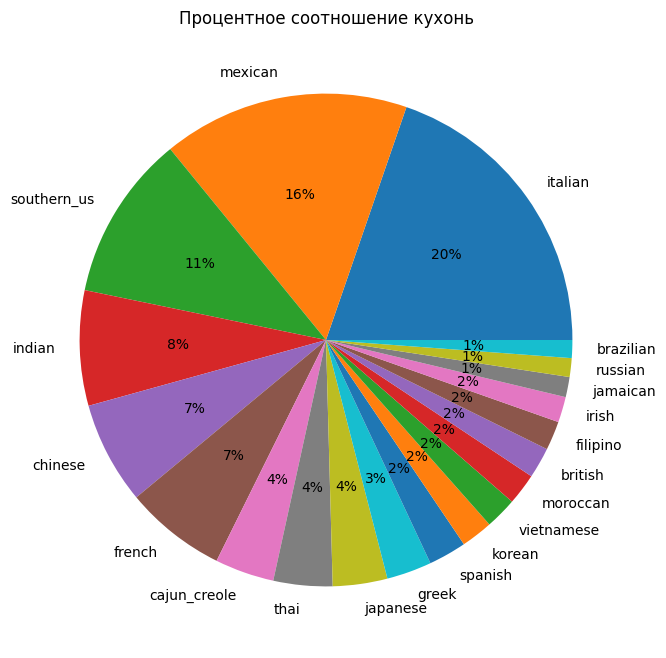

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(cuisine["count"], labels=cuisine["cuisine"], autopct="%.0f%%") 
plt.title("Процентное соотношение кухонь")
plt.show()

Построили piechart, видно что распределение классов неравномерное.

Также попробуем найти самые популярные ингредиенты в таблице.

In [19]:
cuisine = data.drop(columns="cuisine")\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .reset_index()\
    .rename(columns={"index": "ingredient",
                     0: "count"})
cuisine

,ingredient,count
0,salt,18048
1,onions,7972
2,olive oil,7971
3,water,7457
4,garlic,7380
...,...,...
6709,Yoplait® Greek 100 blackberry pie yogurt,1
6710,clementine juice,1
6711,pink lentil,1
6712,Karo Corn Syrup,1


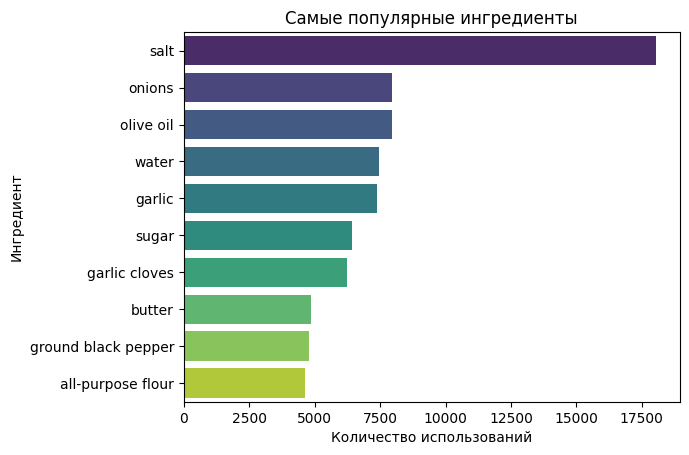

In [20]:
sns.barplot(data=cuisine.head(10), x="count", y="ingredient", palette="viridis")
plt.title("Самые популярные ингредиенты")
plt.xlabel("Количество использований")
plt.ylabel("Ингредиент")
plt.show()

Теперь можно найти популярные игредиенты для каждой кухни.

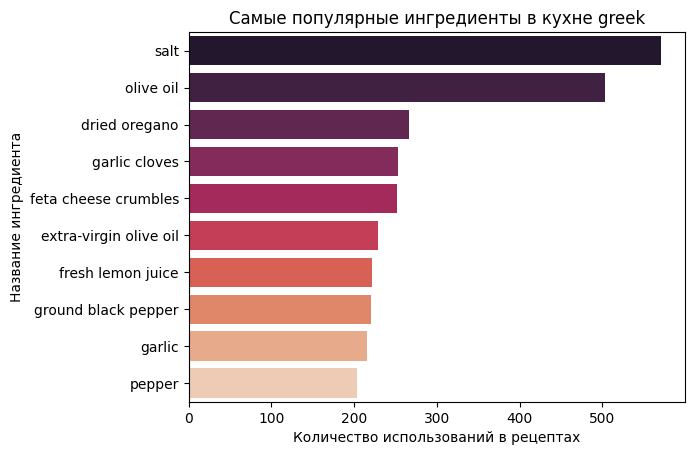

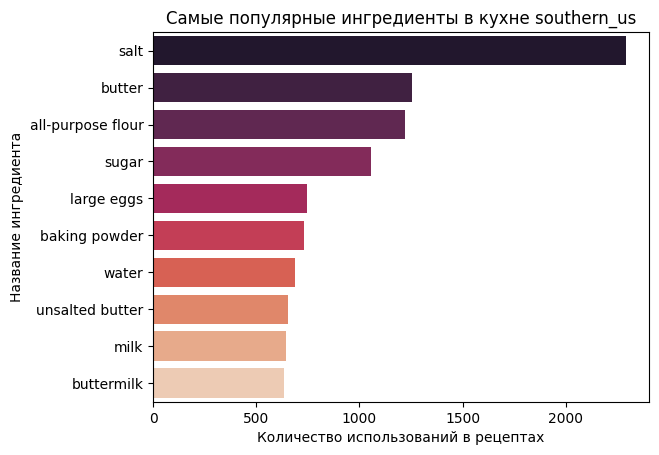

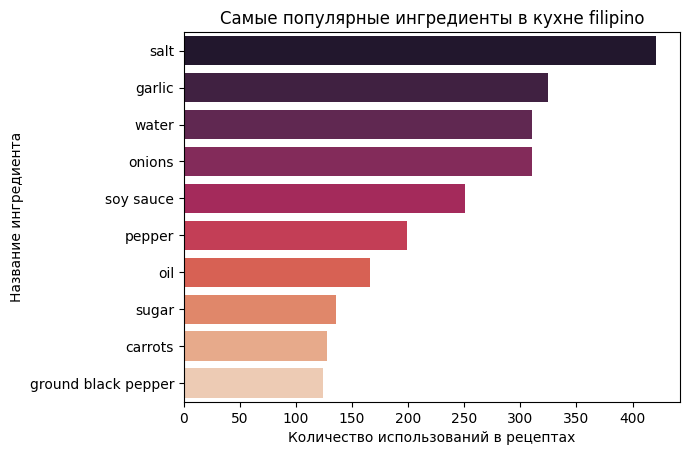

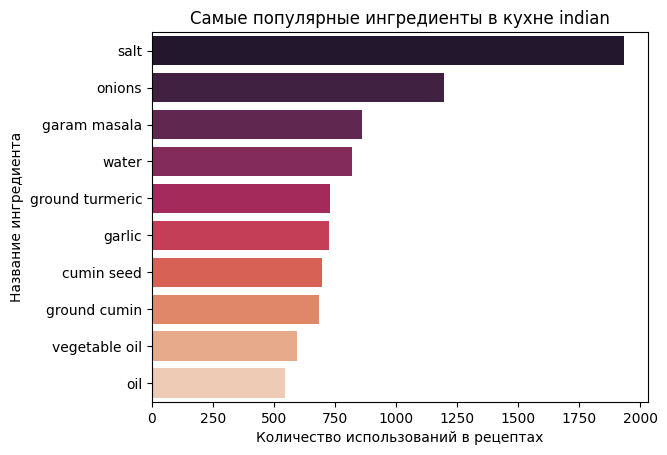

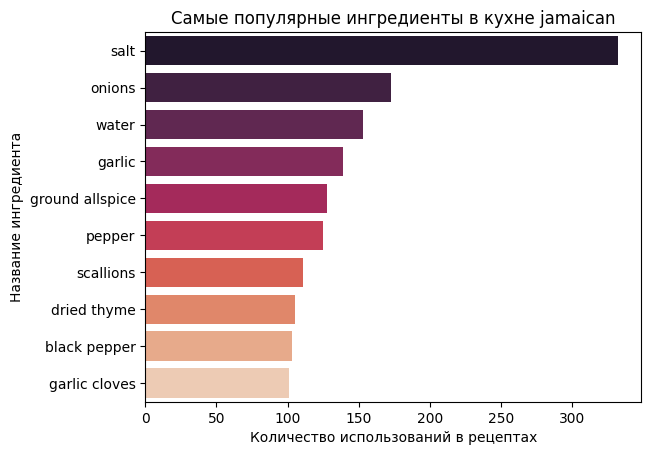

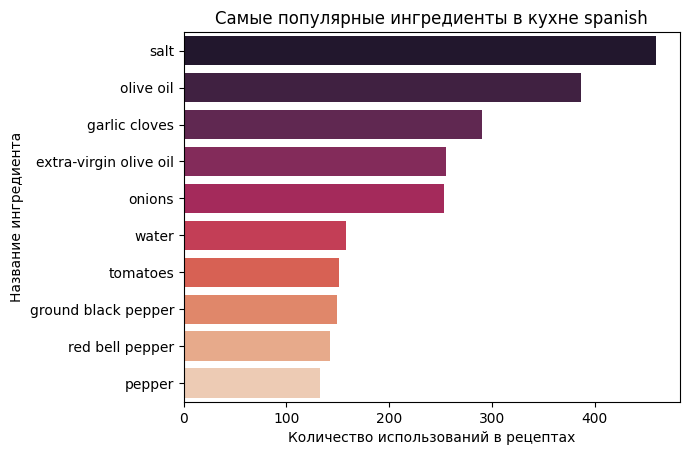

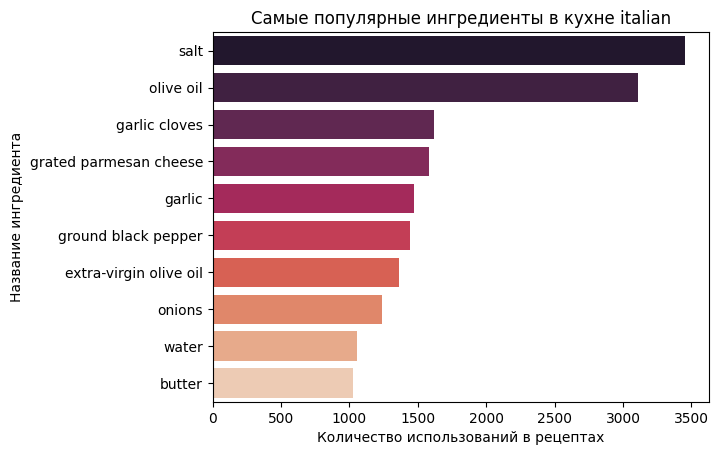

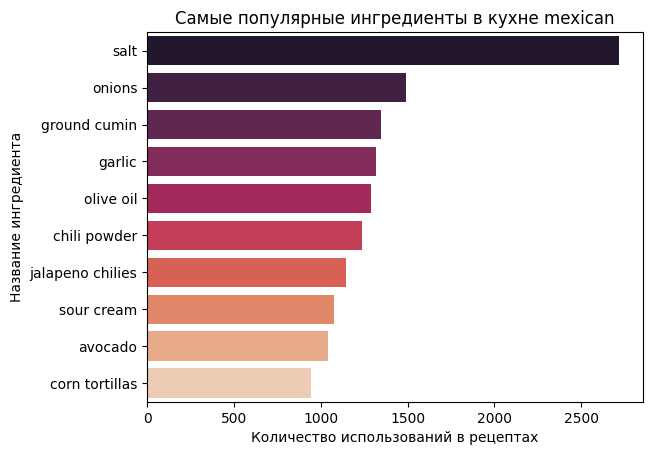

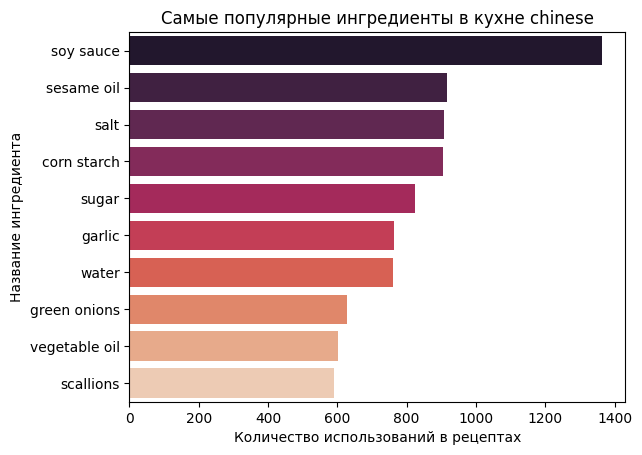

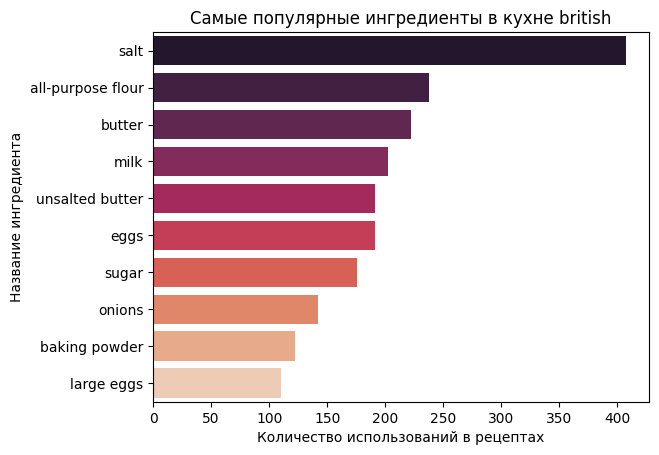

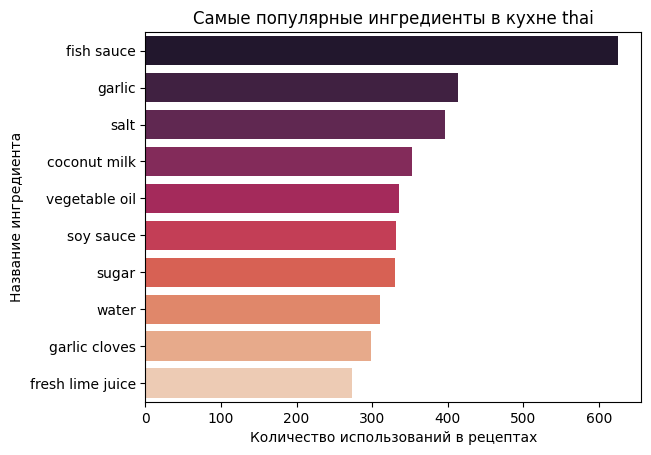

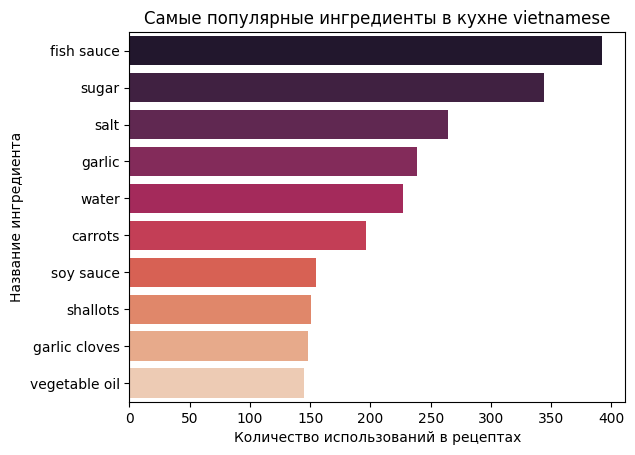

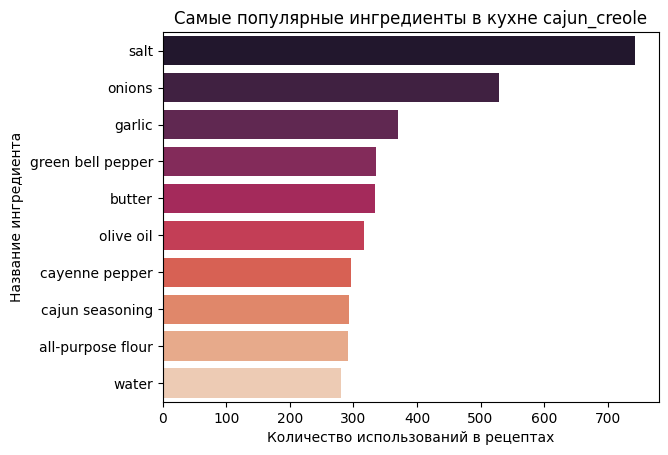

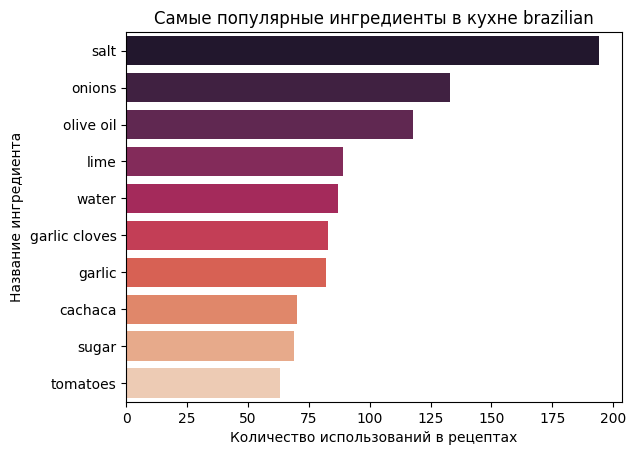

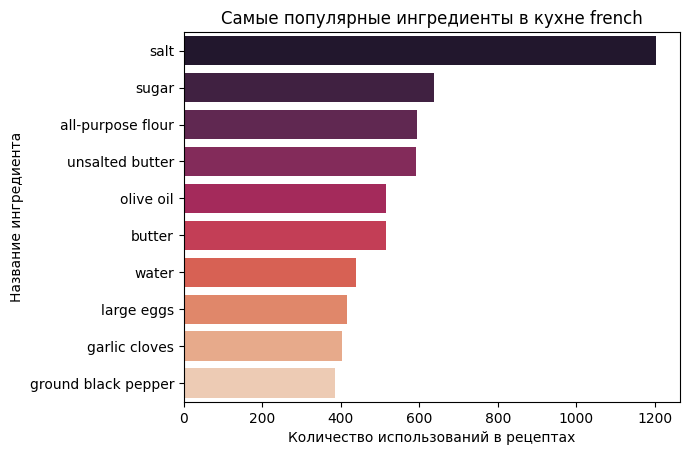

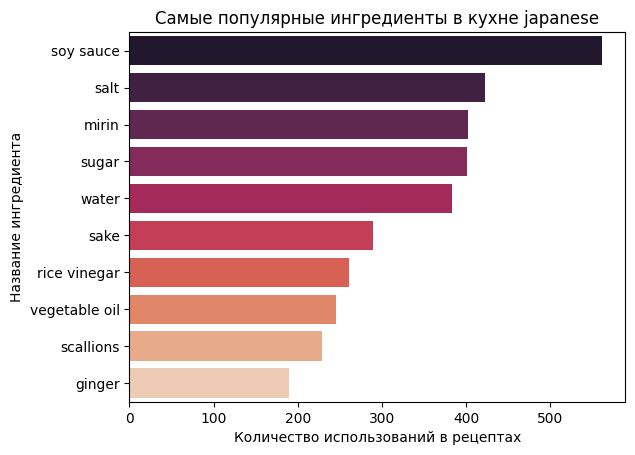

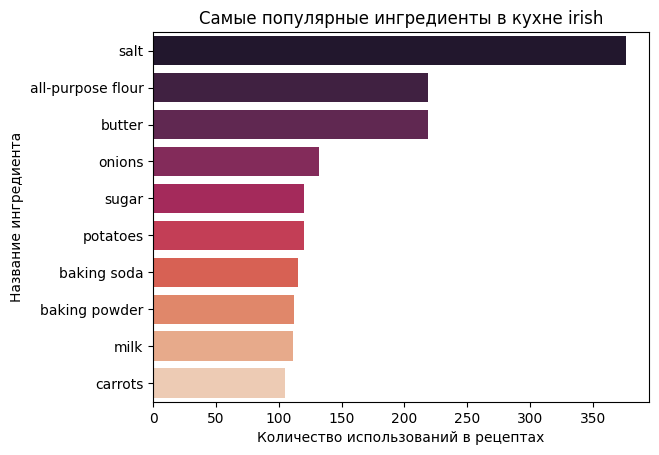

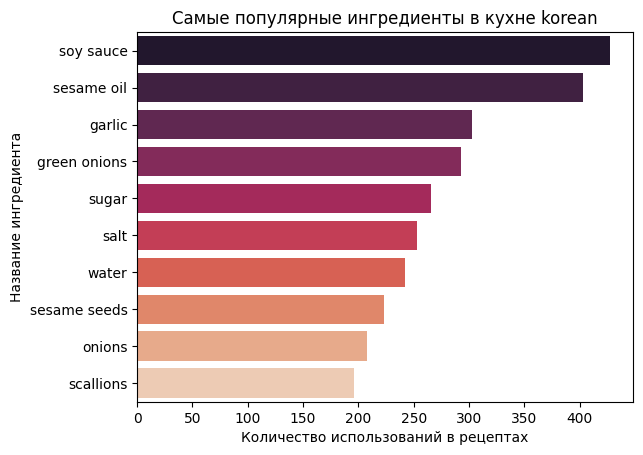

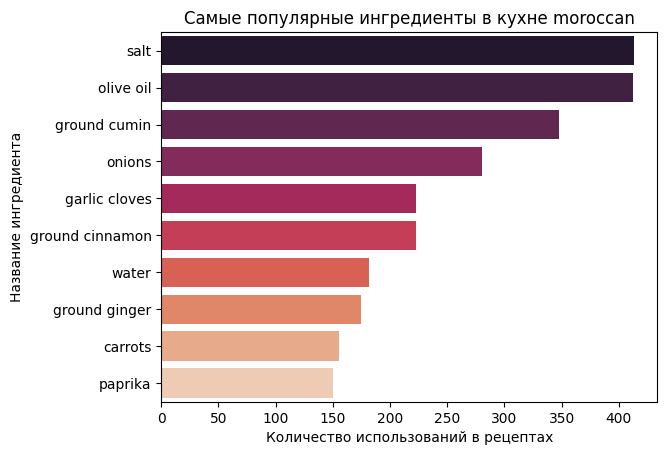

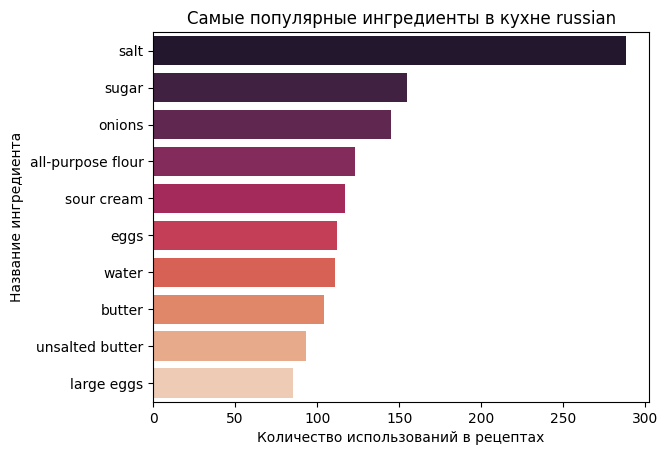

In [21]:
for country_cuisine in data["cuisine"].unique():
    cuisine = data[data["cuisine"] == country_cuisine]\
    .drop(columns="cuisine")\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .reset_index()\
    .rename(columns={"index": "ingredient",
                     0: "count"})
    
    sns.barplot(data=cuisine.head(10), x="count", y="ingredient", palette="rocket")
    plt.title("Самые популярные ингредиенты в кухне {c}".format(c=country_cuisine))
    plt.xlabel("Количество использований в рецептах")
    plt.ylabel("Название ингредиента")
    plt.show()

Все графики построены, можно приступить к обучению моделей.

## Обучение моделей.

Некоторым библиотекам удобнее работать с числовыми таргетами, а не с текстовыми, поэтому закодируем их.

In [22]:
enc = LabelEncoder()
data["cuisine"] = enc.fit_transform(data["cuisine"])
data

,cuisine,chicken wing drummettes,breakfast sausage links,dark soy sauce,orzo pasta,ramen noodles seasoning,tatsoi,Smart Balance Cooking Spray,honey mustard dressing,baby arugula,...,scallion greens,whole wheat couscous,petite peas,sour salt,daal,light beer,turkey mince,okra,crouton italian season,wakame
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="cuisine"),
                                                    data["cuisine"],
                                                    random_state=320,
                                                    test_size=0.33,
                                                    stratify=data["cuisine"])

In [24]:
y_train.value_counts()

cuisine
9     5251
13    4313
16    2894
7     2012
3     1791
5     1773
2     1036
18    1031
11     953
6      787
17     663
12     556
19     553
14     550
1      539
4      506
8      447
10     352
15     328
0      313
Name: count, dtype: int64

In [25]:
y_train.nunique()

20

Видно что в train выборку благодаря stratify попали все классы.

In [26]:
y_test.value_counts()

cuisine
9     2587
13    2125
16    1426
7      991
3      882
5      873
2      510
18     508
11     470
6      388
17     326
12     274
19     272
14     271
1      265
4      249
8      220
10     174
15     161
0      154
Name: count, dtype: int64

In [27]:
y_test.nunique()

20

В test выборку благодаря stratify попали все классы.

Обучим логистическую регрессию.

In [28]:
logistic_regression = LogisticRegression(n_jobs=-1)
logistic_regression.fit(X_train.values, y_train.values)
result = accuracy_score(y_test.values, logistic_regression.predict(X_test.values))
print("Точность логистической регрессии = {r}".format(r=result))

Точность логистической регрессии = 0.7740362639037026


Ещё можно посмотреть вероятностную модель машинного обучения (Наивный Байессовский метод). 
\
Возьмём мультиномиальный наивный байесовский алгоритм для классификации.

In [29]:
naive_bayess_clf = MultinomialNB()
naive_bayess_clf.fit(X_train.values, y_train.values)
result = accuracy_score(y_test.values, naive_bayess_clf.predict(X_test.values))
print("Точность Байессовского алгоритма = {r}".format(r=result))

Точность Байессовского алгоритма = 0.7248209660216365


Попробуем алгоритм случайного леса.

In [30]:
forest_clf = RandomForestClassifier(n_estimators=1000, max_depth=50, n_jobs=-1)
forest_clf.fit(X_train.values, y_train.values)
result = accuracy_score(y_test.values, forest_clf.predict(X_test.values))
print("Точность случайного леса = {r}".format(r=result))

Точность случайного леса = 0.6417034892579613


Попробуем градиентный бустинг

In [30]:
boosting_clf = xgboost.XGBClassifier(n_estimators=100, max_depth=5, tree_method="gpu_hist")
boosting_clf.fit(X_train.values, y_train.values)
result = accuracy_score(y_test.values, boosting_clf.predict(X_test.values))
print("Точность градиентного бустинга = {r}".format(r=result))

Точность градиентного бустинга = 0.7455431967088222


## Результаты обучения

В данном проекте были обработаны данные и обучены 4 алгоритма машинного обучения:
1) Логистическая регрессия: accuracy_score = 0.7740362639037026
2) Мультиномиальный наивный Байесовский алгоритм: accuracy_score = 0.7248209660216365
3) Случайный лес: accuracy_score = 0.6417034892579613
4) Градиентный бустинг в библиотеке xgboost: accuracy_score = 0.7455431967088222

Лучший результат показал алгоритм логистической регрессии, а худший случайный лес.